In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    'figure.figsize': (15, 6),   # Размер фигуры
    'font.size': 12,             # Размер шрифта
    'axes.labelsize': 14,        # Размер шрифта для меток осей
    'xtick.labelsize': 12,       # Размер шрифта для подписей на оси X
    'ytick.labelsize': 12,       # Размер шрифта для подписей на оси Y
    'axes.grid': True,           # Включение сетки
    'grid.alpha': 0.5,           # Прозрачность сетки
    'legend.fontsize': 12,       # Размер шрифта легенды
    'lines.linewidth': 2,        # Толщина линий
    'lines.markersize': 8,       # Размер маркеров
})

**То же самое, что и с классификацией, но без использования логитов и сигмоид**

In [3]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        # Инициализация начального предсказания (среднее значение y)
        self.initial_prediction = np.mean(y)
        predictions = np.full_like(y, self.initial_prediction, dtype=np.float64)

        for _ in range(self.n_estimators):
            # Вычисление остатков
            residuals = y - predictions

            # Обучение дерева решений на остатках
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)

            # Обновление предсказаний
            predictions += self.learning_rate * tree.predict(X)

            # Сохранение модели
            self.models.append(tree)

    def predict(self, X):
        # Начальное предсказание
        predictions = np.full(X.shape[0], self.initial_prediction, dtype=np.float64)

        # Добавление предсказаний всех моделей
        for model in self.models:
            predictions += self.learning_rate * model.predict(X)

        return predictions

In [4]:
# Создание синтетического датасета с помощью make_regression

X, y = make_regression(n_samples=100,        # Количество образцов
                       n_features=10,        # Количество признаков
                       noise=1.0,            # Уровень шума
                       random_state=42       # Для воспроизводимости
                      )

In [5]:
y

array([-500.76289929,  416.77316588,  229.33371172, -202.7240423 ,
       -184.20688467, -127.54306781, -186.39069357,   64.61898396,
         26.00922358,  -98.71664701, -251.49474496,  -48.35491808,
       -365.50150894, -198.53063462,  -77.52083248, -148.35469239,
        186.72080998,  154.23079591,  160.21539642, -281.19763115,
        120.87376973, -118.09637393, -101.579094  , -112.67436388,
        366.74882215,  -95.34531404,  377.19809646, -162.76957725,
       -180.22336428,  -46.67504919, -123.47711619,  255.66531859,
        -60.65958208,  -12.27333509,  465.68844512,    3.56714038,
         -9.87089318,   38.88223786,  -59.14680874,  256.02764328,
        -63.42363463,    0.52152413,   17.1293582 , -145.23488949,
        373.12354607,  161.39291439,  179.53139266, -354.58646521,
         16.92677163,  -98.61248973,   39.22973697,  199.99362731,
        146.78496357, -360.5475471 ,  -38.89658826,  -60.83052466,
        128.98672403,  262.6559801 ,   73.34829567,   39.39882

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,            # Доля тестовой выборки (20%)
                                                    random_state=42           # Для воспроизводимости
                                                   )

In [7]:
# Обучение модели
    
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb.fit(X_train, y_train)

In [8]:
# Предсказание
y_pred = gb.predict(X_test)

In [9]:
y

array([-500.76289929,  416.77316588,  229.33371172, -202.7240423 ,
       -184.20688467, -127.54306781, -186.39069357,   64.61898396,
         26.00922358,  -98.71664701, -251.49474496,  -48.35491808,
       -365.50150894, -198.53063462,  -77.52083248, -148.35469239,
        186.72080998,  154.23079591,  160.21539642, -281.19763115,
        120.87376973, -118.09637393, -101.579094  , -112.67436388,
        366.74882215,  -95.34531404,  377.19809646, -162.76957725,
       -180.22336428,  -46.67504919, -123.47711619,  255.66531859,
        -60.65958208,  -12.27333509,  465.68844512,    3.56714038,
         -9.87089318,   38.88223786,  -59.14680874,  256.02764328,
        -63.42363463,    0.52152413,   17.1293582 , -145.23488949,
        373.12354607,  161.39291439,  179.53139266, -354.58646521,
         16.92677163,  -98.61248973,   39.22973697,  199.99362731,
        146.78496357, -360.5475471 ,  -38.89658826,  -60.83052466,
        128.98672403,  262.6559801 ,   73.34829567,   39.39882

In [10]:
# Оценка качества
# Эти обе чувствительны к выбросам

mse = np.mean((y_test - y_pred) ** 2)      # большое число, хорошо если хотим наказывать за большую ошибку, т.к. она квадратично растет
rmse = mse ** 0.5                          # масштаб равен исходным данным - интерпретируемость лучше

print(f"Mean Squared Error:                 {mse}")
print(f"Root mean square deviation (Error): {rmse}")

Mean Squared Error:                 18816.92575273163
Root mean square deviation (Error): 137.174799991586


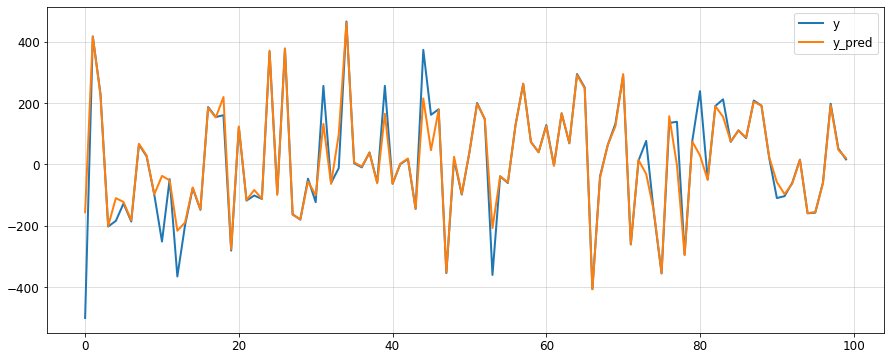

In [11]:
# По всему трейн тест

plt.plot(y, label='y')
plt.plot(gb.predict(X), label='y_pred')
plt.legend()